 # Tema 7:  Clustering
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : DBSCAN \\
  Termina      :
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: (%)
 - Integrante 2: (%)
 - Integrante 3: (%)
 - Integrante 4: (%)


 ----


**Note: You may use previous codes from other exercises to read images from the database or to display images.**


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 1. DBSCAN:
- Input:  
  - Data : La Data  a ser agrupada
  - radio : Rádio de la hiperesfera
  - vecinos_min : Número mínimo de vecinos para ser condiderado cluster.
- Ouput: Vector con las etiquetas de cada elemento de la data.


link de la base de datos: [Aquí](https://drive.google.com/file/d/1KHVUORFr4TcI-4xUXLIlEBxxPS7d5zjQ/view?usp=sharing)

In [27]:
from scipy.spatial import KDTree

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree


def DBSCAN(ds, radio, vecinos_min):
    labels = np.full(ds.shape[0], -1)
    C = 0

    kdtree = KDTree(ds)

    for i in range(ds.shape[0]):
        if labels[i] != -1:
            continue

        vecinos = kdtree.query_ball_point(ds[i], radio)

        if len(vecinos) < vecinos_min:
            labels[i] = 0
            continue

        C += 1
        labels[i] = C

        j = 0
        while j < len(vecinos):
            if labels[vecinos[j]] == 0:
                labels[vecinos[j]] = C
            elif labels[vecinos[j]] == -1:
                labels[vecinos[j]] = C
                vecinos2 = kdtree.query_ball_point(ds[vecinos[j]], radio)
                if len(vecinos2) >= vecinos_min:
                    vecinos += vecinos2
            j += 1
    return labels

# Image hidden information
The database contains hidden information. Some hints are:

- The first two columns in tha dataset "Misterio" indicate the row and column in an image.
- After applying the clustering algorithm and obtaining the labels, you will be able to plot the message where each letter should appear in a different color.

In [28]:
# from google.colab import drive
# drive.mount('/content/drive')
path = 'LAB 9/'

# Deciphering the information with DBSCAN
Read the dataset stored in the file "misterio.csv", and then run your **DBSCAN** algorithm. You should look for good parameters for radius and nearest neighbors to achieve better results.

In [29]:
import pandas as pd
import seaborn as sns

# Cargar el dataset
dataset = pd.read_csv('misterio.csv', header=None)

data = dataset.values
coordinates = data[:, :2]

# Ejecutar DBSCAN
labels = DBSCAN(coordinates, radio=2, vecinos_min=5)


# Show Result
Implement the function show_image that receives the dataset (coordinates i, j) and the labels, which will be the colors used to paint each cluster



34


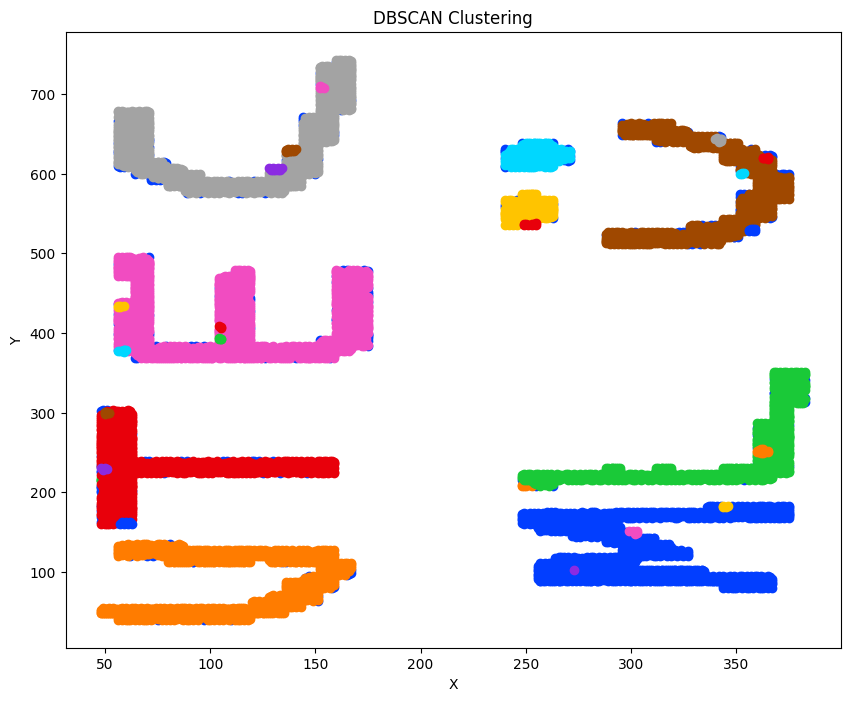

In [30]:
def show_clusters(labels):
    unique_labels = set(labels)
    print(len(unique_labels))
    colors = sns.color_palette('bright', len(unique_labels))

    cluster_colors = {label: color for label, color in zip(unique_labels, colors)}

    plt.figure(figsize=(10, 8))
    for label in unique_labels:
        label_mask = (labels == label)
        color = cluster_colors[label] if label != -1 else (0, 0, 0, 0)
        plt.scatter(coordinates[label_mask, 0], coordinates[label_mask, 1], c=[color], label=f'Cluster {label}' if label != -1 else 'Ruido')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('DBSCAN Clustering')
    plt.show()

show_clusters(labels)

#**One learns when they do things and, along the way, have fun in the process**🚀🚀

#Good Luck😊😊